<a href="https://colab.research.google.com/github/varundeepAvi/Assignments/blob/main/01_apr_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# loading the data frame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance_data.csv')


In [5]:
# Checking the basic values of the data frame like columns and  number of rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


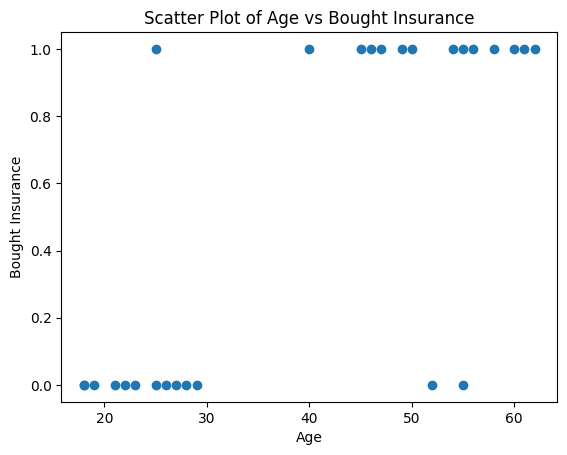

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['age'], df['bought_insurance'])
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.title('Scatter Plot of Age vs Bought Insurance')
plt.show()


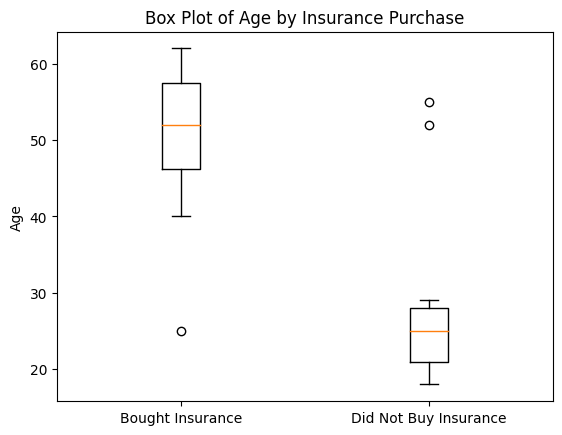

In [7]:
plt.boxplot([df[df['bought_insurance'] == 1]['age'], df[df['bought_insurance'] == 0]['age']], labels=['Bought Insurance', 'Did Not Buy Insurance'])
plt.ylabel('Age')
plt.title('Box Plot of Age by Insurance Purchase')
plt.show()

In [8]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# df_no_outliers is  DataFrame with the 'age' and 'bought_insurance' columns after removing outliers
X = df_no_outliers[['age']]  # Independent variable (feature)
y = df_no_outliers['bought_insurance']  # Dependent variable (target)

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Creating the logistic regression model
logreg = LogisticRegression()

# Fitting the model to the training data
logreg.fit(X_train, y_train)

# Predicting on the test data
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9285714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.88      0.93         8

    accuracy                           0.93        14
   macro avg       0.93      0.94      0.93        14
weighted avg       0.94      0.93      0.93        14


Confusion Matrix:
[[6 0]
 [1 7]]


2. Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,Sepal LengthSepal WidthPetal LengthPetal Width

Using above 4 features you will clasify a flower in one of the three categories,SetosaVersicolourVirginica


Step 1: Load the Iris dataset and import libraries


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Step 2: Pairplot to visualize relationships between features

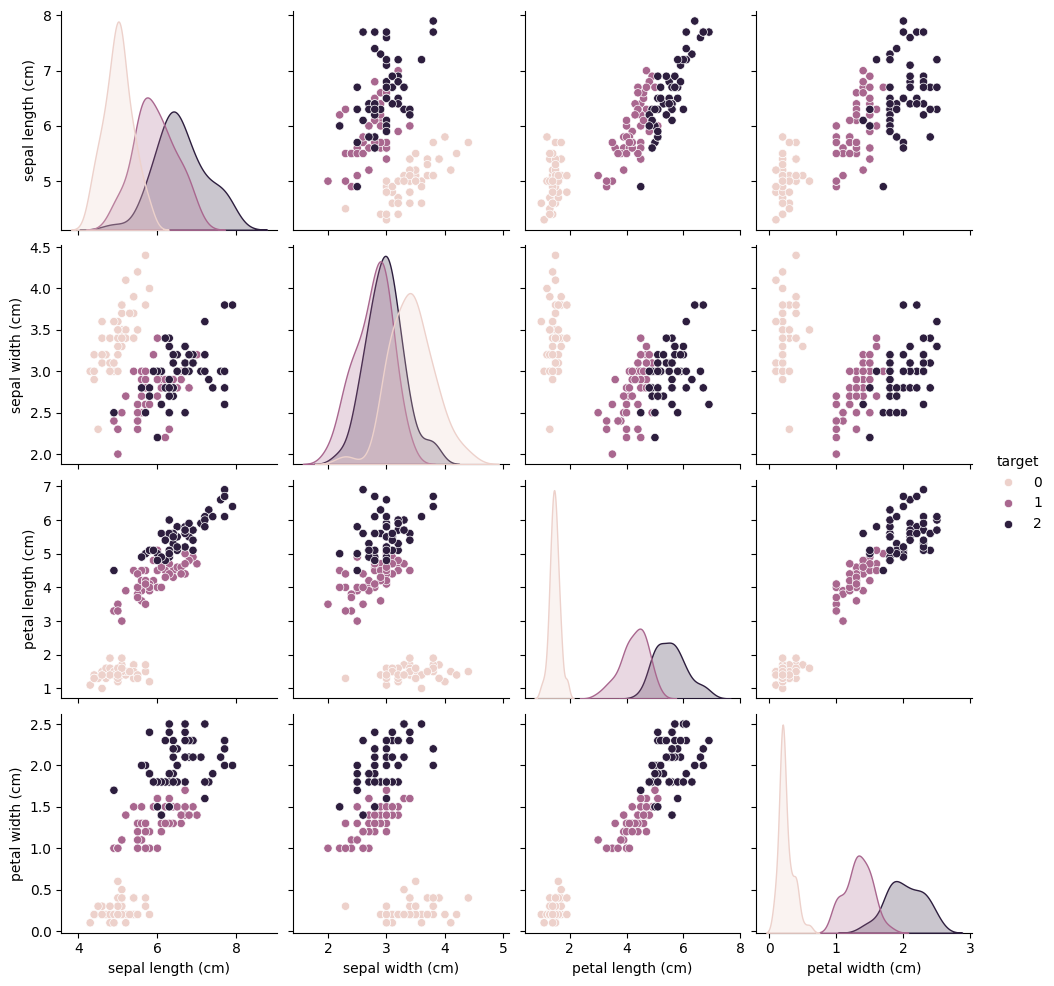

In [12]:
sns.pairplot(df, hue='target')
plt.show()

Step 3: Boxplot to visualize distribution of features by target class

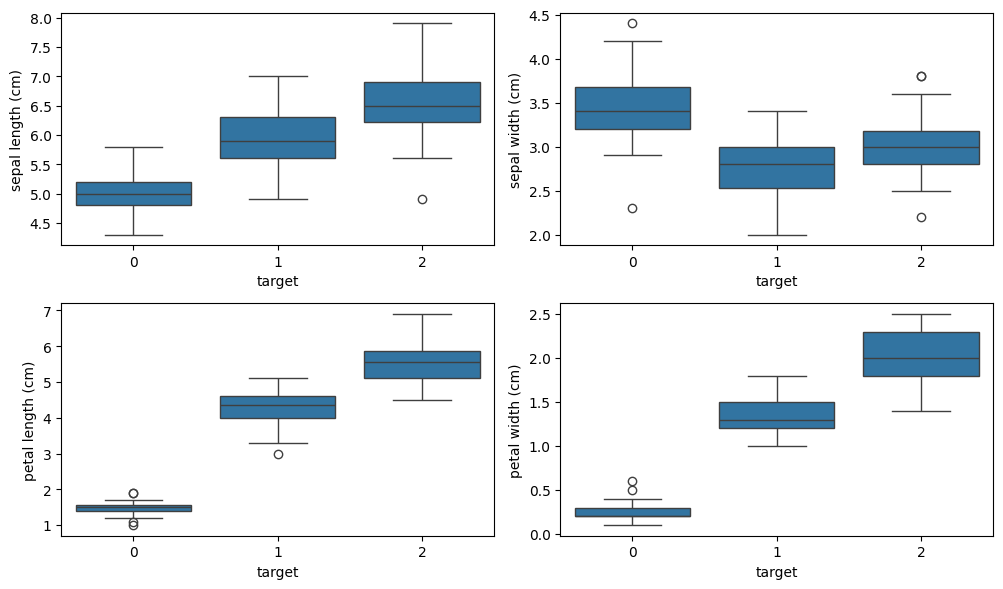

In [13]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=feature, data=df)
plt.tight_layout()
plt.show()

Step 4: Correlation heatmap to visualize correlation between features

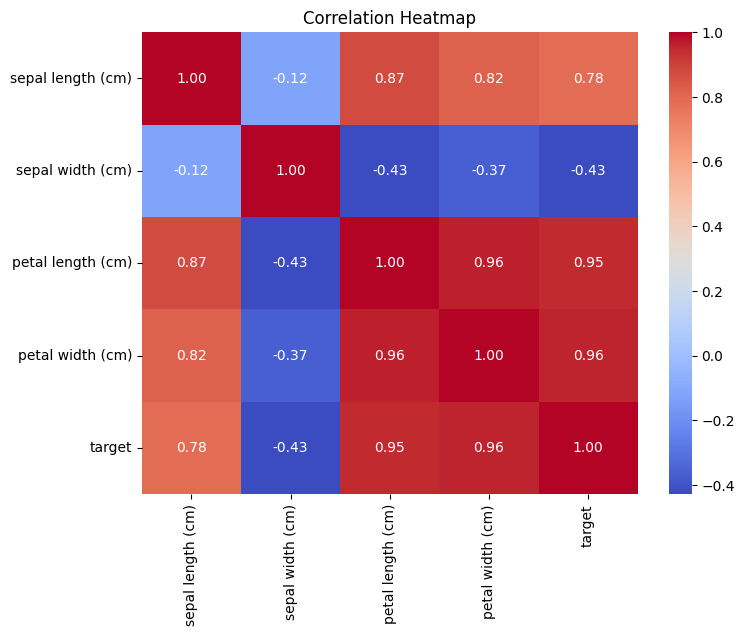

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Step 5: Histograms to visualize distribution of features

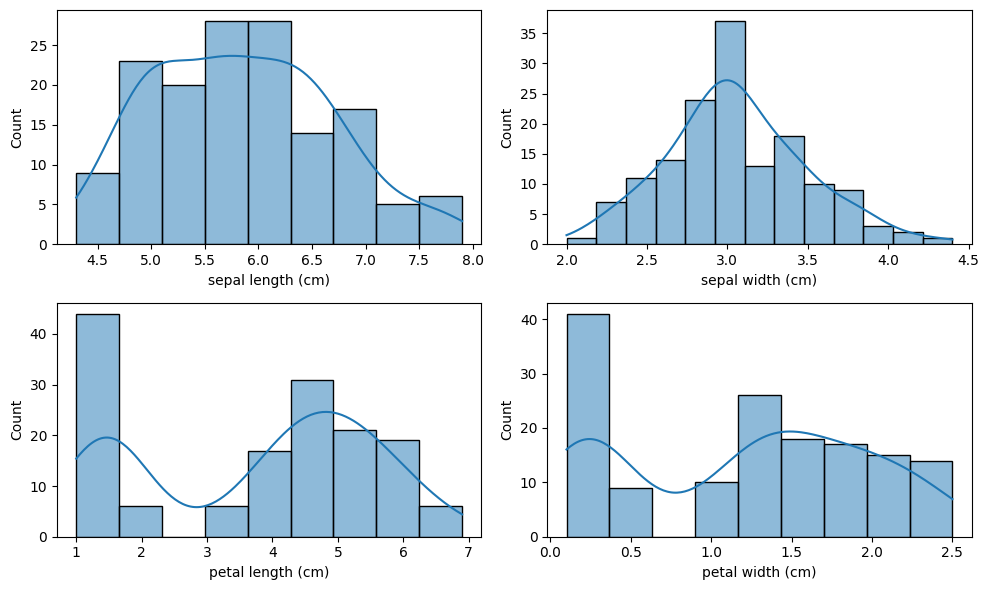

In [15]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=feature, kde=True)
plt.tight_layout()
plt.show()


Step 6: Violin plot to visualize distribution of features by target class

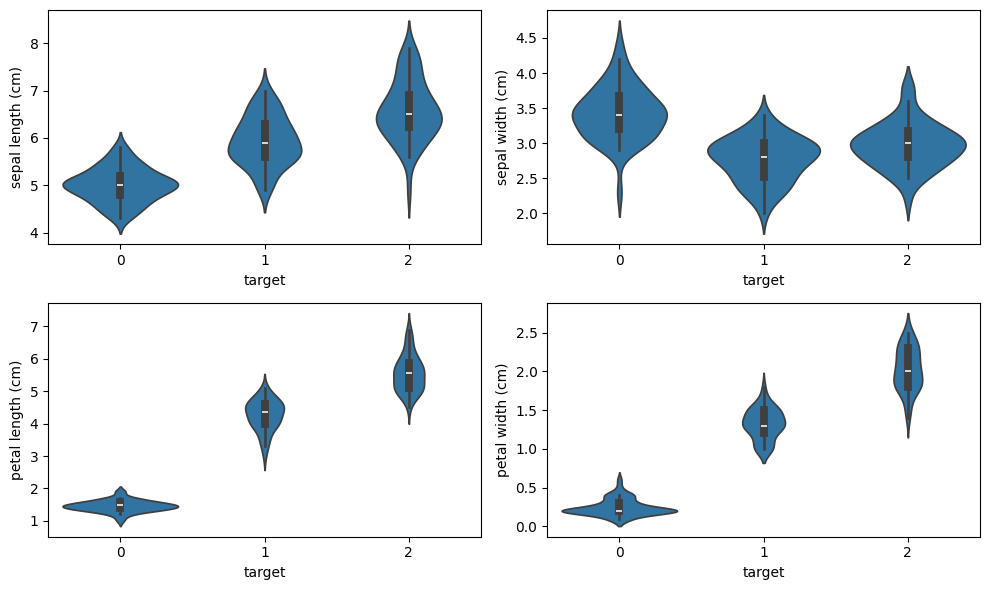

In [16]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='target', y=feature, data=df)
plt.tight_layout()
plt.show()

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fitting the model to the training data
logreg.fit(X_train, y_train)

# Predicting on the test data
y_pred = logreg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predicting classes of different samples in the test dataset
sample_1 = [[5.1, 3.5, 1.4, 0.2]]  # Example sample
sample_2 = [[6.7, 3.0, 5.2, 2.3]]  # Example sample

predicted_class_1 = logreg.predict(sample_1)
predicted_class_2 = logreg.predict(sample_2)

print("\nPredicted class for sample 1:", iris.target_names[predicted_class_1[0]])
print("Predicted class for sample 2:", iris.target_names[predicted_class_2[0]])


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Predicted class for sample 1: setosa
Predicted class for sample 2: virginica
